# MICE
MICE is only used under certail assumptions.
We have 3 types of missing data:
1. Missing Completely at Randon - We do not have any knowledge of why the data is missing (MCAR)
2. Missing At Random - Optional data is not filled by user. We can fill the missing value using other columns. (MAR)
3. Missing Not At Random - The Data has been removed on purpose and we do not have any relation with other data. (MNAR)
## When is MICE best used?
Assumption: 
1. when the data is Missing At Random (MAR)

Adv:
1. Accuracy is better than other techniques

Disadv:
1. Slow processing (speed)
2. Training set has to be on the server (memory)

Mice is only implemented on Input columns:
1. Remove Target Columns
2. See where are the NAN values

Steps:
1. Fill all the NAN values with mean of the same column
2. Now going from left to right do the steps for each column
    - put the original NAN values back in the data.
    - using any model to predict the NANs.
    - continue for each column.

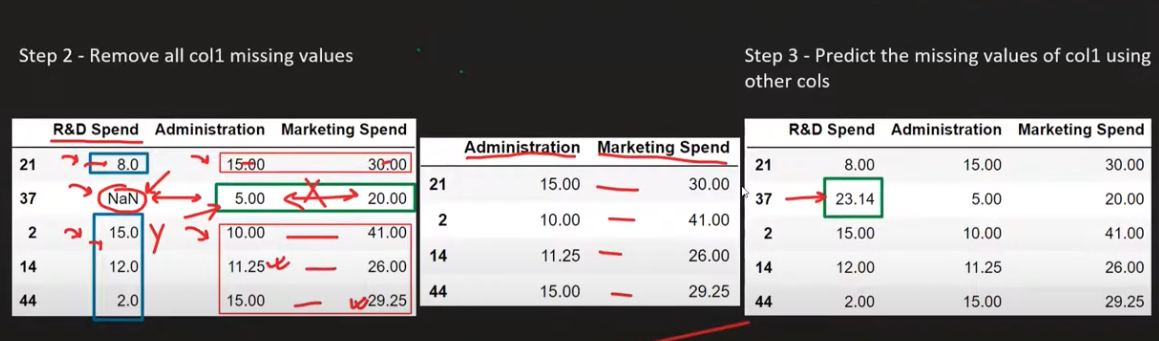 

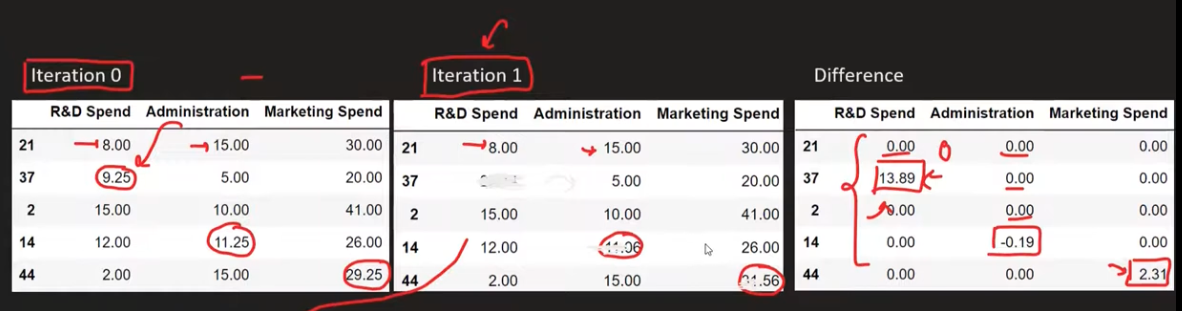

We repeat until diff is 0 or maxed out number of iterations

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [6]:
df = np.round(pd.read_csv('datasets/50_startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)

np.random.seed(9)

df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


### 1. Remove the Target Columns

In [7]:
df = df.iloc[:, 0:-1]
df

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


### 2. Add missing values at random locations

In [9]:
df.iloc[1, 0] = np.NaN
df.iloc[3, 1] = np.NaN
df.iloc[-1, -1] = np.NaN

/var/folders/cb/g9zml9hd4fgfyshv4x2_v4q40000gn/T/ipykernel_98692/1989045429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1, 0] = np.NaN
/var/folders/cb/g9zml9hd4fgfyshv4x2_v4q40000gn/T/ipykernel_98692/1989045429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[3, 1] = np.NaN
/var/folders/cb/g9zml9hd4fgfyshv4x2_v4q40000gn/T/ipykernel_98692/1989045429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[-

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,NaN,5.0,20.0
2,15.0,10.0,41.0
14,12.0,NaN,26.0
44,2.0,15.0,NaN


#### We can now start with the process

In [29]:
# Step 1: Impute all missing values with mean of respective columns

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [30]:
# After 0th iteration
df0

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,9.25,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [31]:
# Remove the col1 imputed value

df1 = df0.copy()
df1.iloc[1, 0] = np.NaN
df1

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.25,26.00
44,2.0,15.00,29.25


In [32]:
# Use the first 3 rows to build a model and use the last for prediction
X = df1.iloc[[0, 2, 3, 4], 1:3]
X

,Administration,Marketing Spend
21,15.00,30.00
2,10.00,41.00
14,11.25,26.00
44,15.00,29.25


In [33]:
y = df1.iloc[[0, 2, 3, 4], 0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [34]:
lr = LinearRegression()
lr.fit(X, y)
df1.iloc[1,0] = lr.predict(df1.iloc[1, 1:].values.reshape(1, 2))[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
df1

,R&D Spend,Administration,Marketing Spend
21,8.000000,15.00,30.00
37,23.141587,5.00,20.00
2,15.000000,10.00,41.00
14,12.000000,11.25,26.00
44,2.000000,15.00,29.25


In [36]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.000000,15.0,30.00
37,23.141587,5.0,20.00
2,15.000000,10.0,41.00
14,12.000000,NaN,26.00
44,2.000000,15.0,29.25


In [37]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
21,8.000000,30.00
37,23.141587,20.00
2,15.000000,41.00
44,2.000000,29.25


In [38]:
y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [39]:
lr = LinearRegression()
lr.fit(X,y)
df1.iloc[3,1] = lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))[0]
df1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,R&D Spend,Administration,Marketing Spend
21,8.000000,15.000000,30.00
37,23.141587,5.000000,20.00
2,15.000000,10.000000,41.00
14,12.000000,11.063618,26.00
44,2.000000,15.000000,29.25


In [49]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.000000,15.000000,30.0
37,23.141587,5.000000,20.0
2,15.000000,10.000000,41.0
14,12.000000,11.063618,26.0
44,2.000000,15.000000,NaN


In [50]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
21,8.000000,15.000000
37,23.141587,5.000000
2,15.000000,10.000000
14,12.000000,11.063618


In [51]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [52]:
lr = LinearRegression()
lr.fit(X,y)
df1.iloc[4,-1] = lr.predict(df1.iloc[4,0:2].values.reshape(1,2))[0]
df1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,R&D Spend,Administration,Marketing Spend
21,8.000000,15.000000,30.000000
37,23.141587,5.000000,20.000000
2,15.000000,10.000000,41.000000
14,12.000000,11.063618,26.000000
44,2.000000,15.000000,31.601847


In [53]:
# Subtract 0th iteration from 1st iteration

df1 - df0

,R&D Spend,Administration,Marketing Spend
21,0.000000,0.000000,0.000000
37,13.891587,0.000000,0.000000
2,0.000000,0.000000,0.000000
14,0.000000,-0.186382,0.000000
44,0.000000,0.000000,2.351847


In [55]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

,R&D Spend,Administration,Marketing Spend
21,8.0,15.000000,30.000000
37,NaN,5.000000,20.000000
2,15.0,10.000000,41.000000
14,12.0,11.063618,26.000000
44,2.0,15.000000,31.601847


In [56]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
df2.iloc[1, 0] = lr.predict(df2.iloc[1,1:].values.reshape(1,2))[0]
df2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,R&D Spend,Administration,Marketing Spend
21,8.000000,15.000000,30.000000
37,23.828703,5.000000,20.000000
2,15.000000,10.000000,41.000000
14,12.000000,11.063618,26.000000
44,2.000000,15.000000,31.601847


In [58]:
df2.iloc[3,1] = np.NaN
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
df2.iloc[3,1] = lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))[0]
df2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,R&D Spend,Administration,Marketing Spend
21,8.000000,15.000000,30.000000
37,23.828703,5.000000,20.000000
2,15.000000,10.000000,41.000000
14,12.000000,11.230737,26.000000
44,2.000000,15.000000,31.601847


In [59]:
df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
df2.iloc[4,-1] = lr.predict(df2.iloc[4,0:2].values.reshape(1,2))[0]
df2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,R&D Spend,Administration,Marketing Spend
21,8.000000,15.000000,30.000000
37,23.828703,5.000000,20.000000
2,15.000000,10.000000,41.000000
14,12.000000,11.230737,26.000000
44,2.000000,15.000000,39.390436


In [60]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.000000,0.000000,0.000000
37,0.687117,0.000000,0.000000
2,0.000000,0.000000,0.000000
14,0.000000,0.167119,0.000000
44,0.000000,0.000000,7.788589


In [61]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

,R&D Spend,Administration,Marketing Spend
21,8.0,15.000000,30.000000
37,NaN,5.000000,20.000000
2,15.0,10.000000,41.000000
14,12.0,11.230737,26.000000
44,2.0,15.000000,39.390436


In [64]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
df3.iloc[1,0] = lr.predict(df3.iloc[1,1:].values.reshape(1,2))[0]
df3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,R&D Spend,Administration,Marketing Spend
21,8.000000,15.000000,30.000000
37,26.887784,5.000000,20.000000
2,15.000000,10.000000,41.000000
14,12.000000,11.230737,26.000000
44,2.000000,15.000000,39.390436


In [66]:
df3.iloc[3,1] = np.NaN
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
df3.iloc[3,1] = lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))[0]
df3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,R&D Spend,Administration,Marketing Spend
21,8.000000,15.000000,30.000000
37,26.887784,5.000000,20.000000
2,15.000000,10.000000,41.000000
14,12.000000,12.275798,26.000000
44,2.000000,15.000000,39.390436
